In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import tensorflow.keras as keras
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

from tensorflow.keras.callbacks import *

from sklearn.metrics import mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import os

2021-09-02 18:54:12.774966: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-02 18:54:12.775072: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [82]:
frame = pd.read_csv(r'201905_per_day_first_weather_1day.csv')
#frame = pd.read_csv(r'ausleihen_mit_wetter.csv')
df = pd.DataFrame(frame)
col = list(df.columns.values)

test = pd.DataFrame(frame)

df.head()

,year,day,month,start station,start station latitude,start station longitude,anzahl,precipMM,humidity,tempC,day1anzahl,dayofweek
0,2019,1,5,1 Ave & E 110 St,40.792327,-73.938300,34,0.011765,71.000000,11.647059,0.0,2.0
1,2019,1,5,1 Ave & E 16 St,40.732219,-73.981656,281,0.022727,71.363636,11.636364,0.0,2.0
2,2019,1,5,1 Ave & E 18 St,40.733812,-73.980544,165,0.010526,70.842105,11.736842,0.0,2.0
3,2019,1,5,1 Ave & E 30 St,40.741444,-73.975361,155,0.022222,70.777778,11.888889,0.0,2.0
4,2019,1,5,1 Ave & E 44 St,40.750020,-73.969053,129,0.023529,70.176471,11.941176,0.0,2.0


In [83]:
#get input and output
x = df.drop("anzahl",axis=1).drop("start station",axis=1) #.drop("starttime",axis=1)
y = df["anzahl"]

In [84]:
#split data into train and test
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=False)

In [86]:
#normalise data
ct = make_column_transformer(
 (MinMaxScaler(),["start station longitude","start station latitude","dayofweek",
                  "day1anzahl","tempC","precipMM","humidity","dayofweek","year","day","month"]))

 

ct.fit(x_train)

x_train_normalized = ct.transform(x_train)

x_test_normalized = ct.transform(x_test)

x_train_normalized.shape

print(x_test_normalized.shape)

(4801, 11)


In [100]:
#create Model structure
with tf.device('/device:CPU:0'):
    model = Sequential()
    model.add(Dense(11, kernel_initializer='normal',  activation='relu', input_shape=(11,) ))    
    model.add(Dense(6, kernel_initializer='normal',activation='relu'))   
    model.add(Dense(6, kernel_initializer='normal',activation='relu'))   
    model.add(Dense(1, kernel_initializer='normal',activation=None))

In [105]:
#set model loss and optimizer
with tf.device('/device:CPU:0'):
    model.compile(optimizer= Adam(learning_rate=0.001),loss='mae', metrics=['mae','mape'])

In [106]:
#checkpoint to save best Model which isnt overfitted
checkpoint = ModelCheckpoint('Model1', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min' )

In [108]:
#train Model
with tf.device('/device:CPU:0'):
    history = model.fit(x_train_normalized, y_train.values, epochs=100 , batch_size=10,shuffle=False   )

Epoch 1/100
1921/1921 [==============================] - 2s 970us/step - loss: 58.0057 - mae: 58.0057 - mape: 148.0251
Epoch 2/100
1921/1921 [==============================] - 2s 975us/step - loss: 57.9598 - mae: 57.9598 - mape: 149.3771
Epoch 3/100
1921/1921 [==============================] - 2s 960us/step - loss: 57.9187 - mae: 57.9187 - mape: 150.6357
Epoch 4/100
1921/1921 [==============================] - 2s 981us/step - loss: 57.8786 - mae: 57.8786 - mape: 151.8897
Epoch 5/100
1921/1921 [==============================] - 2s 982us/step - loss: 57.8466 - mae: 57.8466 - mape: 153.0436
Epoch 6/100
1921/1921 [==============================] - 2s 963us/step - loss: 57.8161 - mae: 57.8161 - mape: 154.1413
Epoch 7/100
1921/1921 [==============================] - 2s 962us/step - loss: 57.7863 - mae: 57.7863 - mape: 155.2387
Epoch 8/100
1921/1921 [==============================] - 2s 956us/step - loss: 57.7637 - mae: 57.7637 - mape: 156.2144
Epoch 9/100
1921/1921 [=========================

1921/1921 [==============================] - 2s 993us/step - loss: 57.5304 - mae: 57.5304 - mape: 175.9752
Epoch 70/100
1921/1921 [==============================] - 2s 1ms/step - loss: 57.5302 - mae: 57.5302 - mape: 176.0690
Epoch 71/100
1921/1921 [==============================] - 2s 995us/step - loss: 57.5301 - mae: 57.5301 - mape: 176.1625
Epoch 72/100
1921/1921 [==============================] - 2s 990us/step - loss: 57.5299 - mae: 57.5299 - mape: 176.2564
Epoch 73/100
1921/1921 [==============================] - 2s 1ms/step - loss: 57.5297 - mae: 57.5297 - mape: 176.3500
Epoch 74/100
1921/1921 [==============================] - 2s 1ms/step - loss: 57.5295 - mae: 57.5295 - mape: 176.4435
Epoch 75/100
1921/1921 [==============================] - 2s 1ms/step - loss: 57.5293 - mae: 57.5293 - mape: 176.5372
Epoch 76/100
1921/1921 [==============================] - 2s 979us/step - loss: 57.5292 - mae: 57.5292 - mape: 176.6310
Epoch 77/100
1921/1921 [==============================] - 2s 

KeyboardInterrupt: 

In [109]:
stationnamesframe =   test.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['start station'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
stationnames =  pd.DataFrame(stationnamesframe , columns=['start station'])['start station'].to_numpy().tolist()
print(len(stationnames))

793


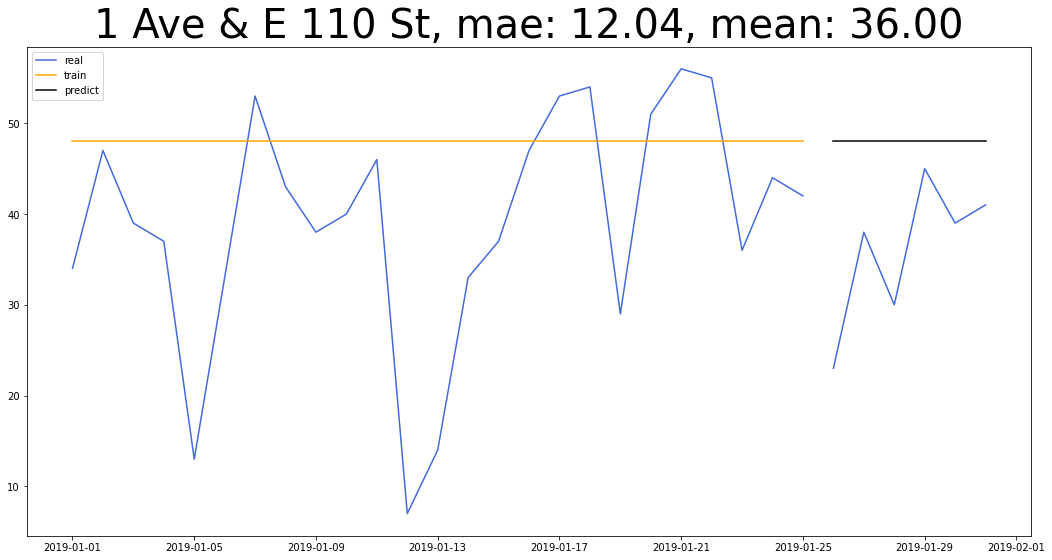

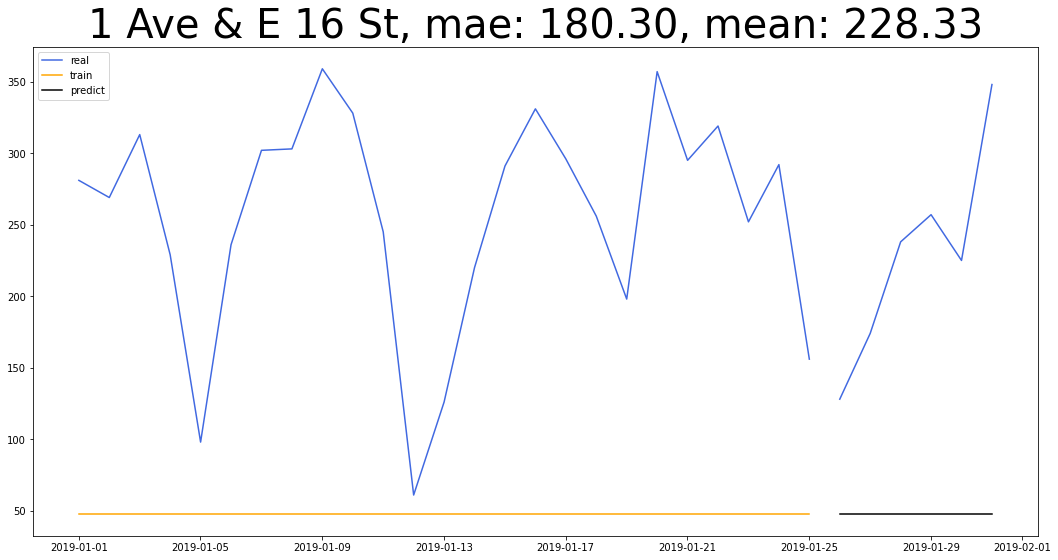

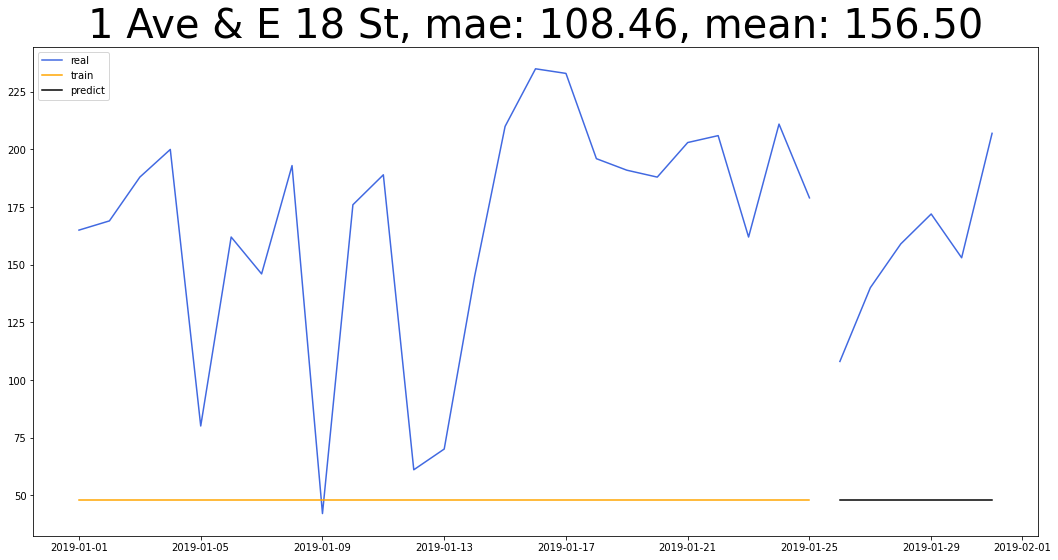

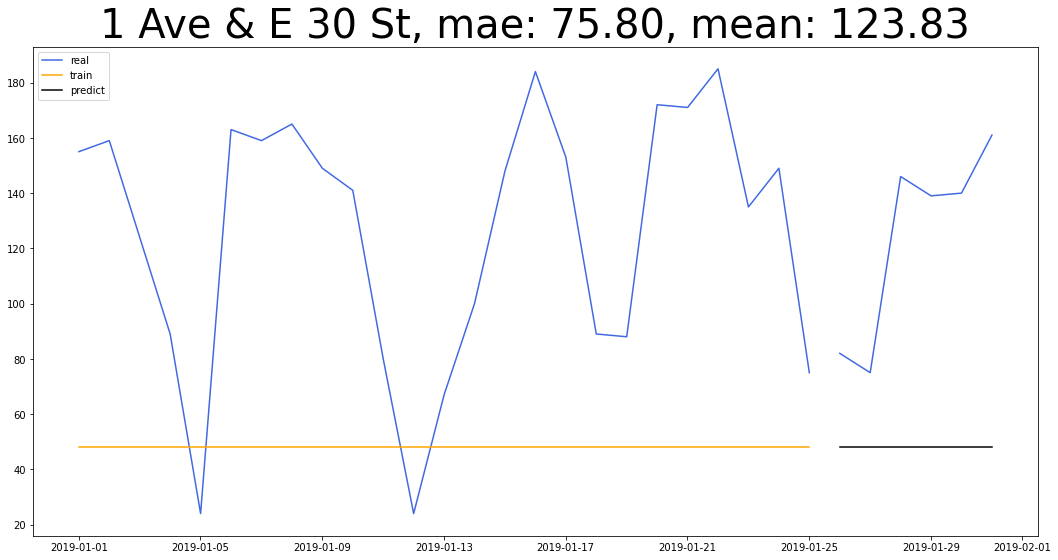

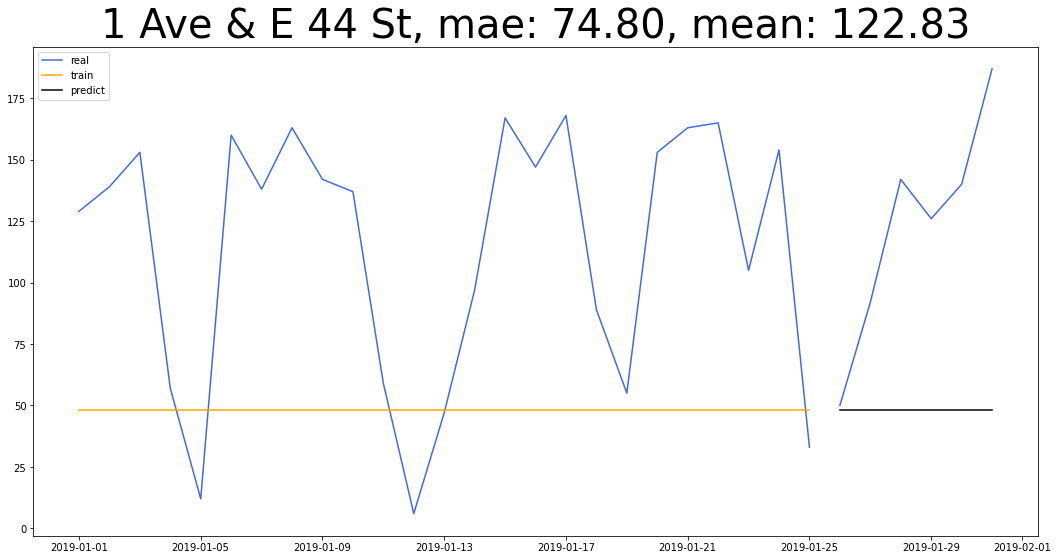

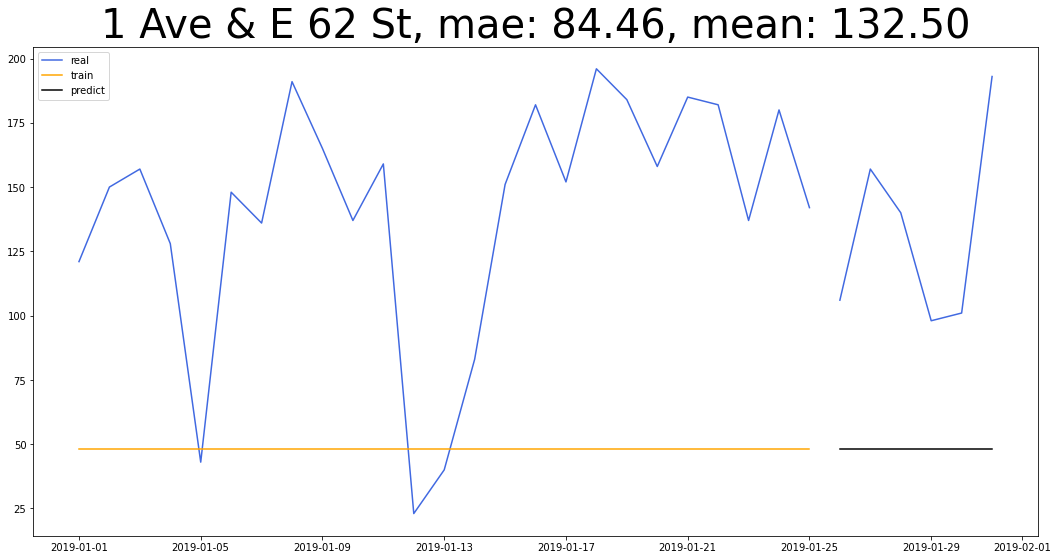

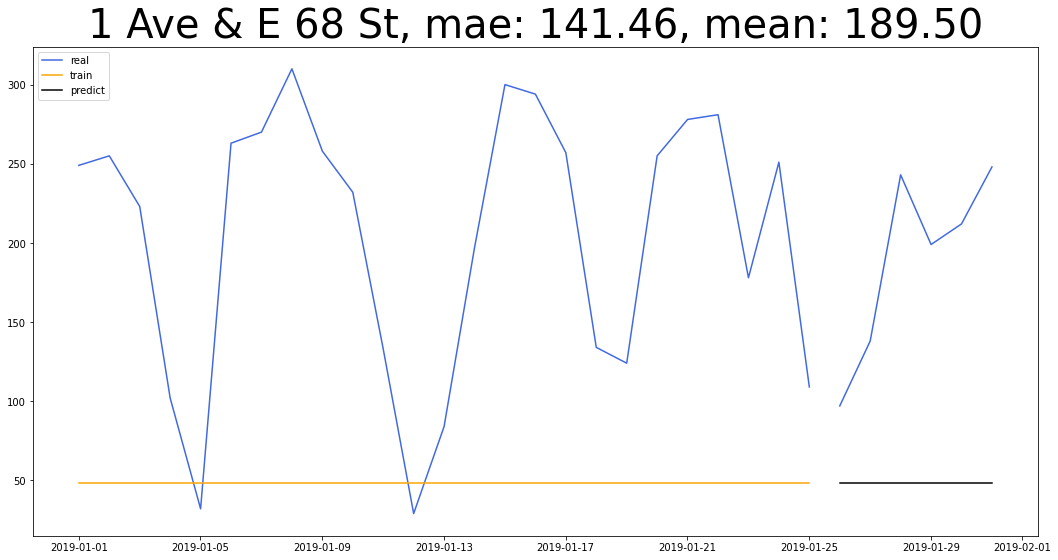

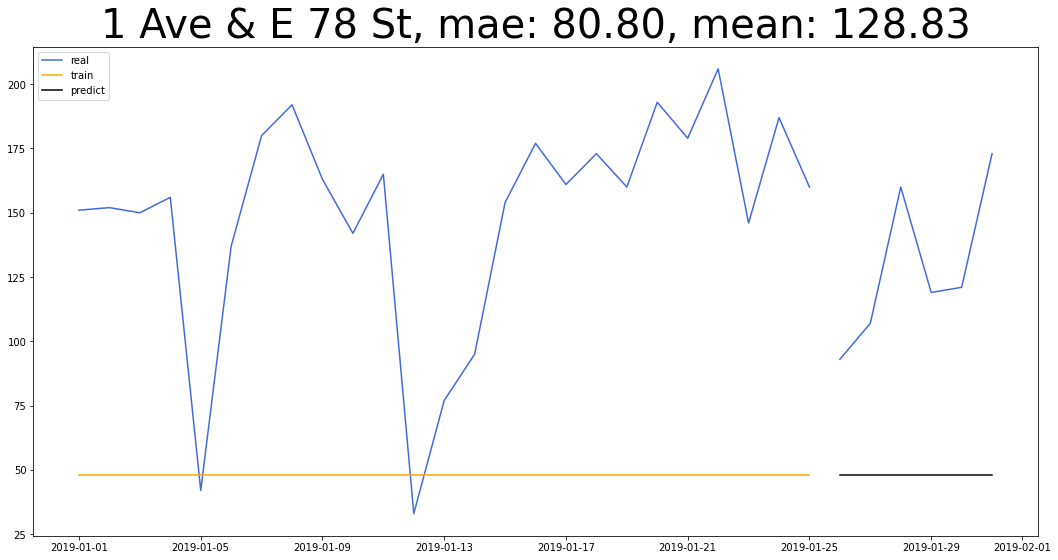

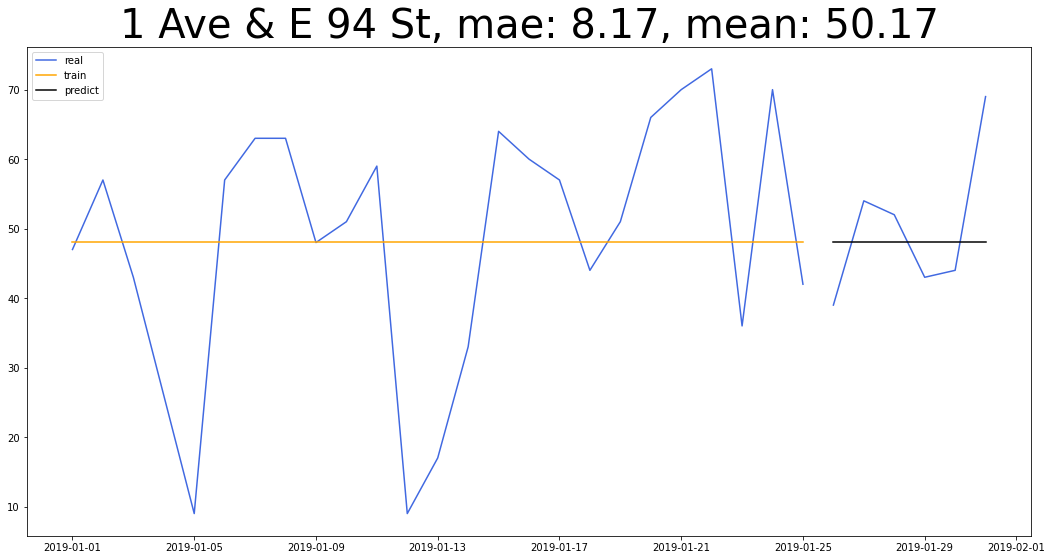

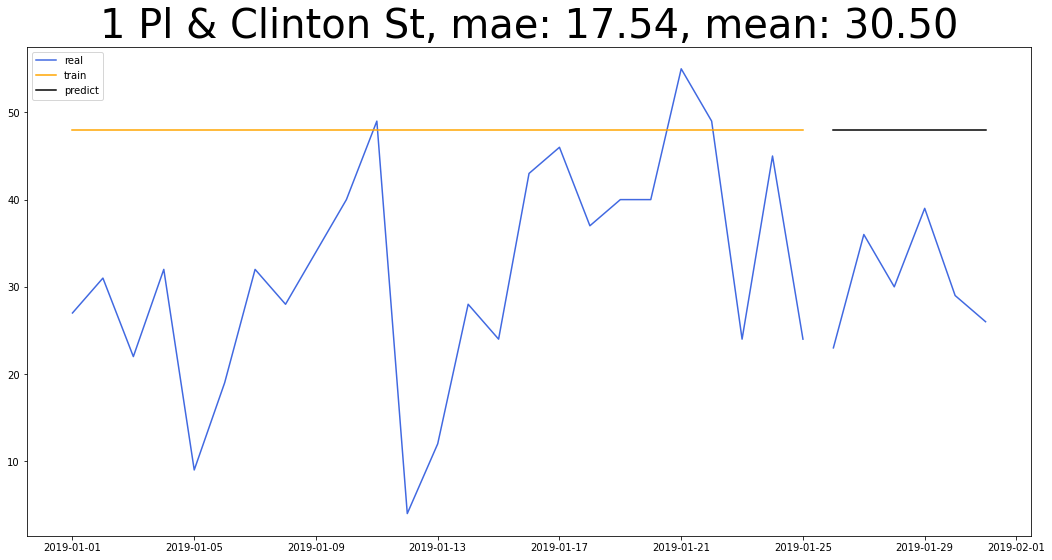

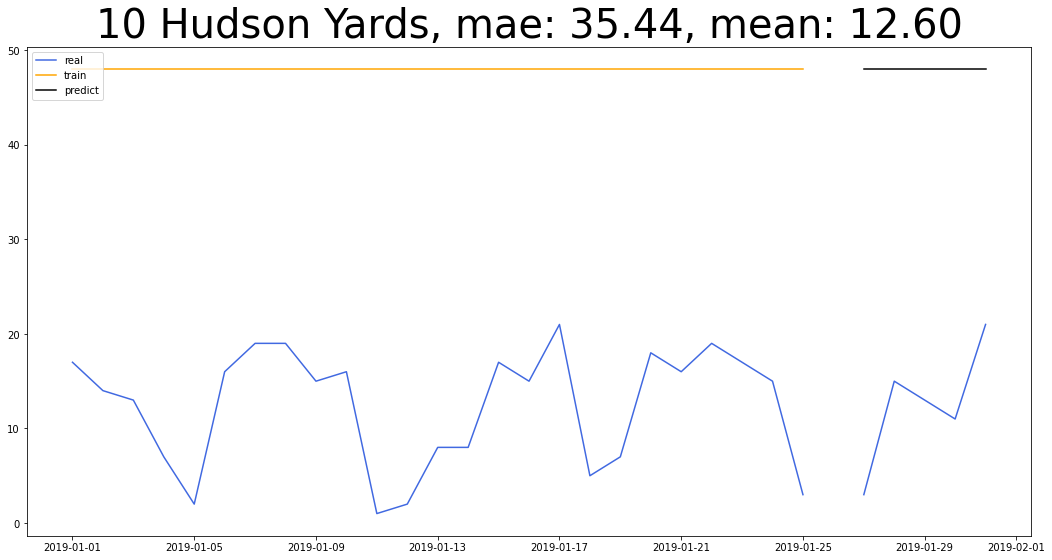

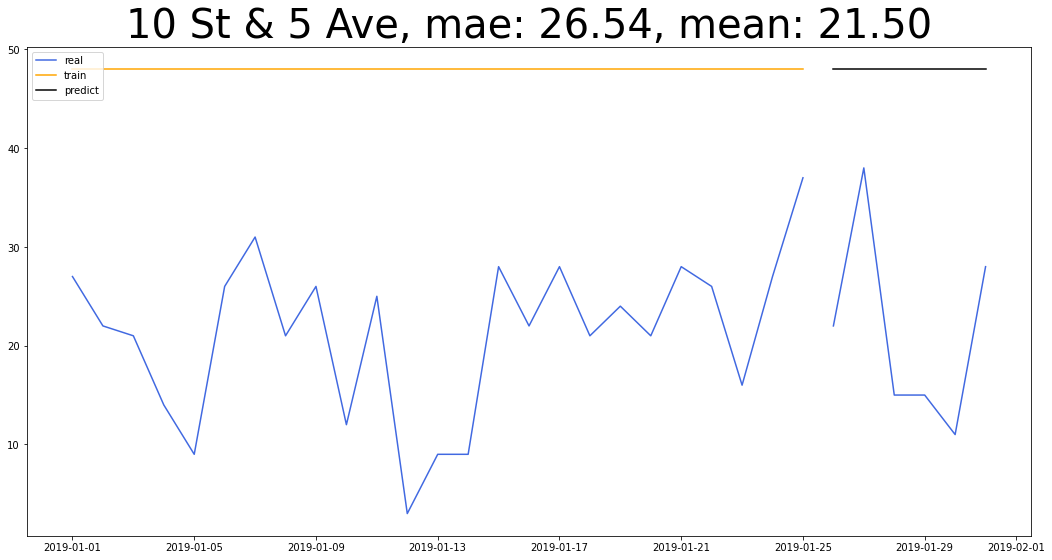

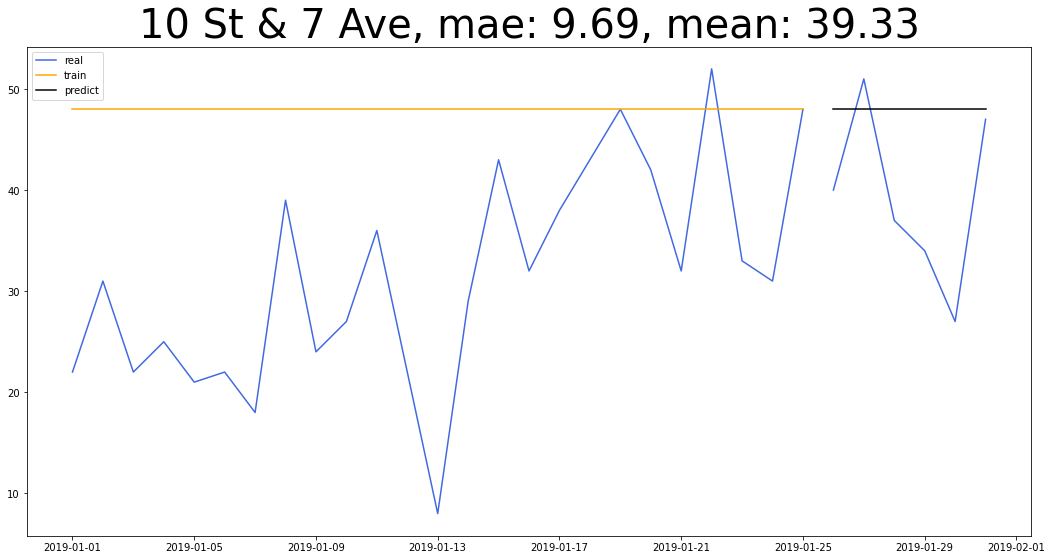

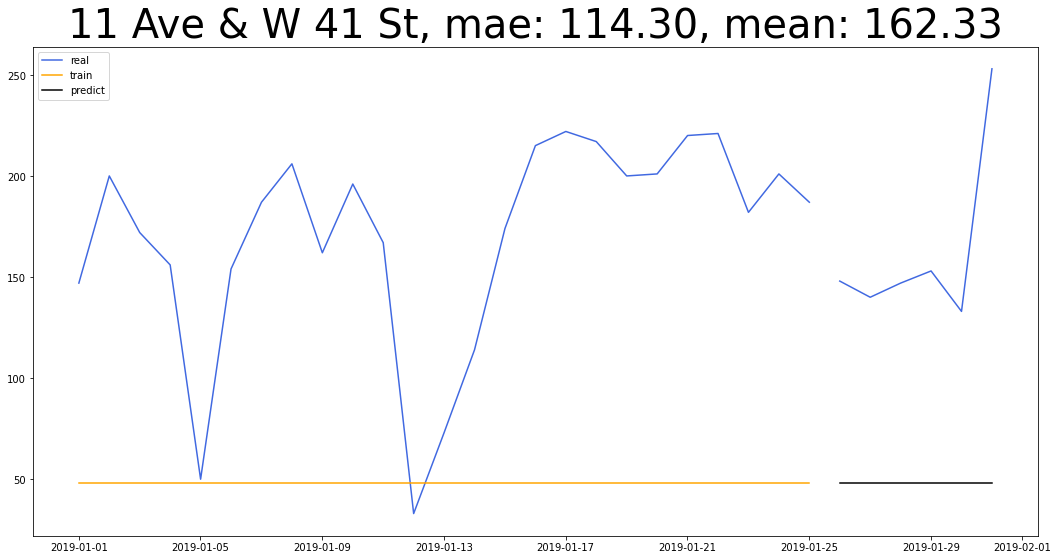

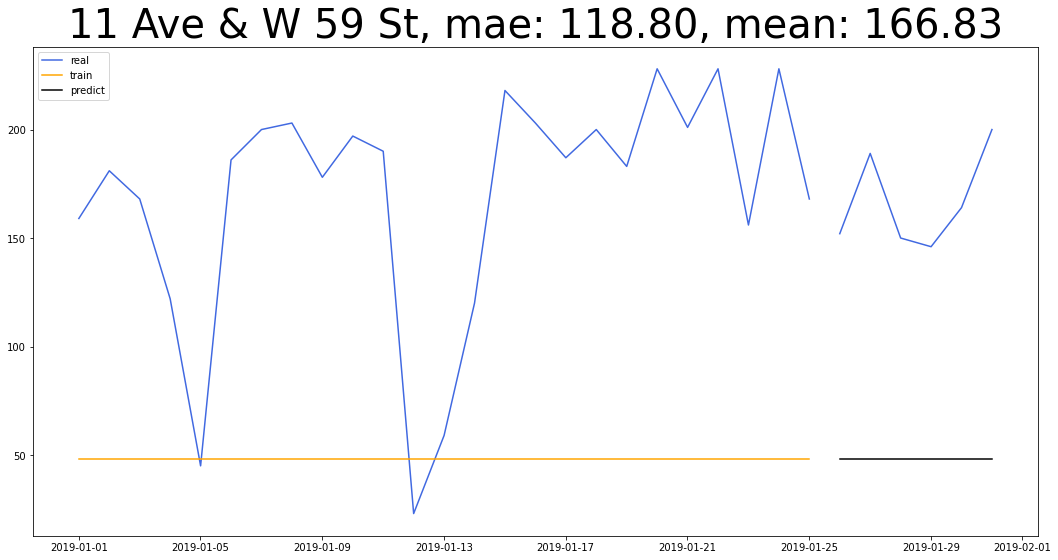

KeyboardInterrupt: 

In [110]:
#show result data linear

for station in stationnames:
    predict_train = model.predict(x_train_normalized)
    y1 =  y_train 
    y2 =  predict_train 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    
    plt.figure(figsize=(18,9))
    
    test1 = df.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['start station']==station]
    #test1['yearweek'] = test1['starttime']
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + '-' + test1['day'].astype(str) + '-' + test1['month'].astype(str),format='%Y-%d-%M')
    #print(test1)

    plt.plot(test1['yearweek'],test1['y'],label='real' , color = 'royalblue'  )
    plt.plot(test1['yearweek'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test_normalized)
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    #print(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['start station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + '-' + test2['day'].astype(str) + '-' + test2['month'].astype(str),format='%Y-%d-%M')
                                       #test2['yearweek'] = pd.to_datetime(test2['starttime'].astype(str) + ' ' + test2['hour'].astype(str),format='%Y-%M-%d %H')
    #print(test2)
    #print(test2['y'])
    
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae)+", mean: {:0.2f}".format(test2['y'].mean()) ,
          fontsize=40,
          color="black")
        #plt.show()
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")
    
    
    plt.plot(test2['yearweek'],test2['y'],label='_Hidden' , color = 'royalblue'  )
    plt.plot(test2['yearweek'],test2['y2'],label='predict' , color = 'black' )
    
    plt.legend(loc="upper left")
    #plt.savefig( 'Model1Images/'+station+'linear.jpg',bbox_inches='tight', dpi=150)
    plt.show()

In [63]:
df['anzahl'].max()

172

In [96]:
df

,year,day,month,start station,start station latitude,start station longitude,anzahl,precipMM,humidity,tempC,day1anzahl,dayofweek
0,2019,1,5,1 Ave & E 110 St,40.792327,-73.938300,34,0.011765,71.000000,11.647059,0.0,2.0
1,2019,1,5,1 Ave & E 16 St,40.732219,-73.981656,281,0.022727,71.363636,11.636364,0.0,2.0
2,2019,1,5,1 Ave & E 18 St,40.733812,-73.980544,165,0.010526,70.842105,11.736842,0.0,2.0
3,2019,1,5,1 Ave & E 30 St,40.741444,-73.975361,155,0.022222,70.777778,11.888889,0.0,2.0
4,2019,1,5,1 Ave & E 44 St,40.750020,-73.969053,129,0.023529,70.176471,11.941176,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23999,2019,31,5,Wyckoff Av & Jefferson St,40.707165,-73.923711,30,0.000000,56.076923,23.846154,19.0,4.0
24000,2019,31,5,Wyckoff St & 3 Ave,40.682755,-73.982586,36,0.000000,56.266667,23.800000,19.0,4.0
24001,2019,31,5,Wyckoff St & Bond St,40.684617,-73.987213,13,0.000000,53.700000,24.200000,4.0,4.0
24002,2019,31,5,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,152,0.015789,57.842105,23.526316,96.0,4.0
